In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

In [2]:
df=pd.read_csv('blogs_categories.csv')
df

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
...,...,...,...
19992,19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19993,19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19994,19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
19995,19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [3]:
df = df.rename(columns={'Unnamed: 0':'S.No'})
df

,S.No,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
...,...,...,...
19992,19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19993,19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19994,19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
19995,19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   S.No    19997 non-null  int64 
 1   Data    19997 non-null  object
 2   Labels  19997 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.8+ KB


In [5]:
df.describe()

,S.No
count,19997.000000
mean,9998.000000
std,5772.781002
min,0.000000
25%,4999.000000
50%,9998.000000
75%,14997.000000
max,19996.000000


In [6]:
df.columns

Index(['S.No', 'Data', 'Labels'], dtype='object')

In [7]:
df.dtypes

S.No       int64
Data      object
Labels    object
dtype: object

In [8]:
df.isna().sum()

S.No      0
Data      0
Labels    0
dtype: int64

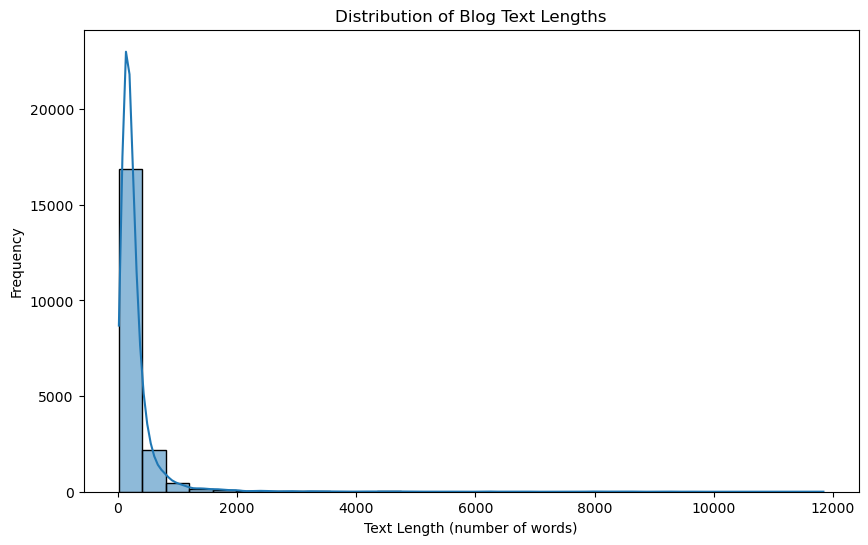

In [9]:
# Creating the text_length column
df['text_length'] = df['Data'].apply(lambda x: len(x.split()))

# Plotting the distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Distribution of Blog Text Lengths')
plt.xlabel('Text Length (number of words)')
plt.ylabel('Frequency')
plt.show()

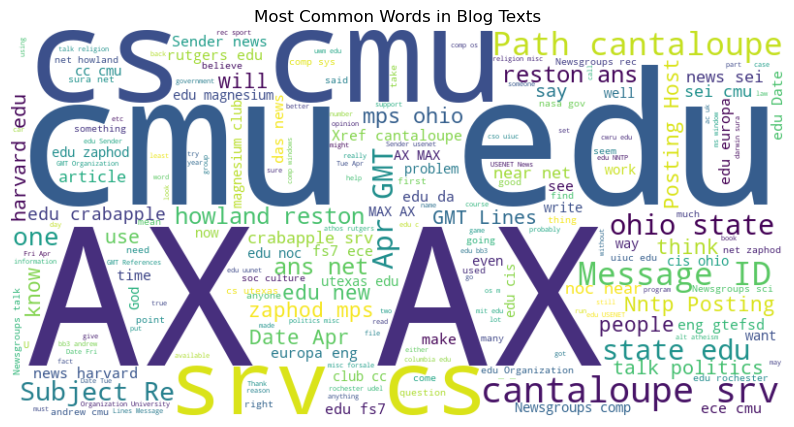

In [10]:
from wordcloud import WordCloud

# Combine all the blog texts into one string
all_text = ' '.join(df['Data'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Blog Texts')
plt.show()

In [11]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vishal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vishal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Define a function to clean and preprocess the text
def preprocess_text(text, use_stemming=True, use_lemmatization=True):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Apply stemming or lemmatization
    if use_stemming:
        words = [stemmer.stem(word) for word in words]
    if use_lemmatization:
        words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# Apply the preprocessing function to the Data column
df['cleaned_text'] = df['Data'].apply(preprocess_text)
     

In [13]:
df.head()

,S.No,Data,Labels,text_length,cleaned_text
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism,1726,xref cantaloupesrvcscmuedu altatheism49960 alt...
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,5248,xref cantaloupesrvcscmuedu altatheism51060 alt...
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,738,newsgroup altath path cantaloupesrvcscmueducra...
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,277,xref cantaloupesrvcscmuedu altatheism51120 alt...
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,133,xref cantaloupesrvcscmuedu altatheism51121 soc...


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the cleaned_text column to TF-IDF features
tfidf_features = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Display the shape of the TF-IDF features matrix
print("Shape of TF-IDF features matrix:", tfidf_features.shape)

Shape of TF-IDF features matrix: (19997, 234609)


# Naive Bayes Model for Text Classification

In [15]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, df['Labels'], test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (15997, 234609)
Shape of X_test: (4000, 234609)
Shape of y_train: (15997,)
Shape of y_test: (4000,)


In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()

# Train the classifier on the training data
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.89325
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.72      0.79      0.76       173
           comp.graphics       0.88      0.89      0.89       179
 comp.os.ms-windows.misc       0.94      0.85      0.89       226
comp.sys.ibm.pc.hardware       0.84      0.85      0.84       204
   comp.sys.mac.hardware       0.90      0.96      0.93       205
          comp.windows.x       0.96      0.94      0.95       186
            misc.forsale       0.91      0.76      0.83       190
               rec.autos       0.90      0.96      0.93       203
         rec.motorcycles       1.00      0.95      0.97       218
      rec.sport.baseball       0.99      0.98      0.99       192
        rec.sport.hockey       0.98      0.99      0.98       203
               sci.crypt       0.86      0.99      0.92       200
         sci.electronics       0.93      0.88      0.91       227
                 sci.med       1.0

In [17]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()

# Train the classifier on the training data
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.89325


# Sentiment Analysis


In [18]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on a sample text
sample_text = "This blog post is really informative and helpful."
scores = sid.polarity_scores(sample_text)

# Print the sentiment scores
print("Sentiment Scores:")
print(scores)

Sentiment Scores:
{'neg': 0.0, 'neu': 0.696, 'pos': 0.304, 'compound': 0.4703}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vishal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [19]:
# Function to categorize sentiment
def categorize_sentiment(text):
    # Perform sentiment analysis
    scores = sid.polarity_scores(text)
    # Classify sentiment based on compound score
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the Data column
df['Sentiment'] = df['Data'].apply(categorize_sentiment)

# Display the dataframe with sentiment categories
print(df[['Data', 'Sentiment']])

                                                    Data Sentiment
0      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...  Positive
1      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  Positive
2      Newsgroups: alt.atheism\nPath: cantaloupe.srv....  Negative
3      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  Positive
4      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  Negative
...                                                  ...       ...
19992  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...  Positive
19993  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...  Positive
19994  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  Positive
19995  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  Positive
19996  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  Negative

[19997 rows x 2 columns]


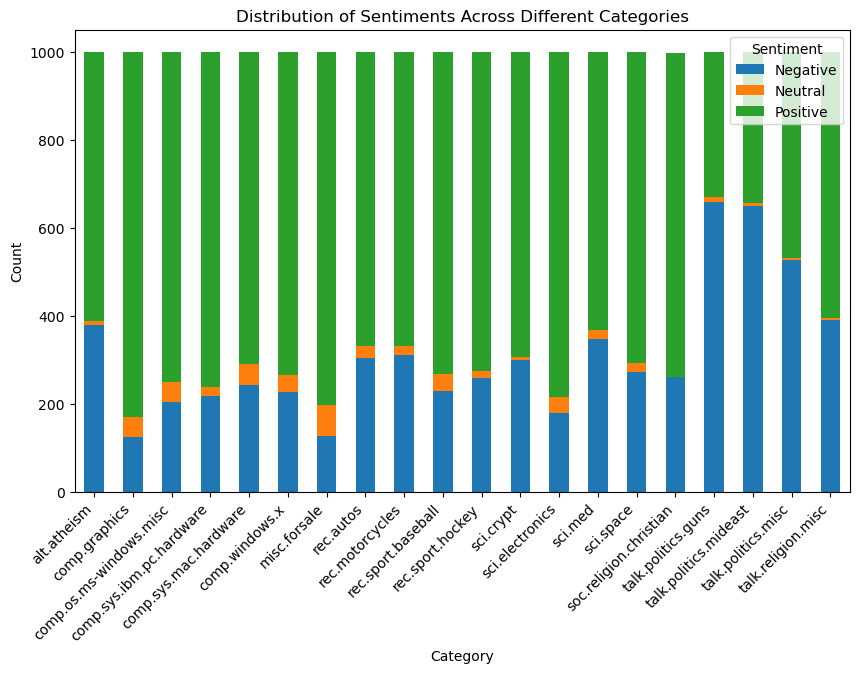

In [20]:
# Group by category and sentiment, and count occurrences
sentiment_distribution = df.groupby(['Labels', 'Sentiment']).size().unstack(fill_value=0)

# Plot the distribution of sentiments across different categories
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Sentiments Across Different Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.show()

# Evaluation

In [21]:
# Evaluate the performance of the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.72      0.79      0.76       173
           comp.graphics       0.88      0.89      0.89       179
 comp.os.ms-windows.misc       0.94      0.85      0.89       226
comp.sys.ibm.pc.hardware       0.84      0.85      0.84       204
   comp.sys.mac.hardware       0.90      0.96      0.93       205
          comp.windows.x       0.96      0.94      0.95       186
            misc.forsale       0.91      0.76      0.83       190
               rec.autos       0.90      0.96      0.93       203
         rec.motorcycles       1.00      0.95      0.97       218
      rec.sport.baseball       0.99      0.98      0.99       192
        rec.sport.hockey       0.98      0.99      0.98       203
               sci.crypt       0.86      0.99      0.92       200
         sci.electronics       0.93      0.88      0.91       227
                 sci.med       1.00      0.95      0

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.89325
Precision: 0.8926781744587827
Recall: 0.89325
F1-score: 0.8915217947542405


# End Assignment